In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an


#from scipy.optimize import curve_fit


main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/'



In [2]:
clist = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300', 'k']

# $\chi_v = 500$

In [3]:
dir_list = ['chiv500_chis1_taus0.1', 
            'chiv500_chis1_taus1', 
            'chiv500_chis1_taus10', 
            'chiv500_chis1_taus50', 
            'chiv500_chis1_taus100', 
            'chiv500_chis1_taus1000']

Nt_dict = {}

for dirname in dir_list :
    taus = dirname[len('chiv500_chis1_taus'):]
    Nt_dict[taus] = {}
    print('taus : ', taus)
    for i in range(20) :
        Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat'))
        print(i, ' done !', end='\r')
    print('\n')


res_avg, res_std = {}, {}
for taus in Nt_dict.keys() :
    res_avg[taus], res_std[taus] = an.batch(data_dict=Nt_dict[taus], wmin=-5, wmax=3, nwindow=40)



taus :  0.1
19  done !

taus :  1
19  done !

taus :  10
19  done !

taus :  50
19  done !

taus :  100
19  done !

taus :  1000
19  done !

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !
End of import !
End of import !
End of import !


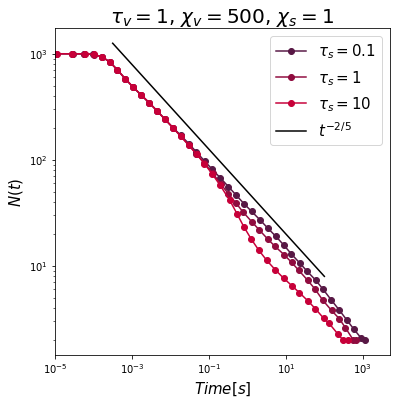

In [4]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')
#for i in range(20) :
#    plt.plot(Nt_taus100[i][:, 0], Nt_taus100[i][:, 1], color='k', alpha=0.2)

c = 0
sim = False
if sim :
    for taus in Nt_dict.keys() :
        for i in range(20) :
            plt.plot(Nt_dict[taus][i][:, 0], Nt_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
for taus in ['0.1', '1', '10'] :
#for taus in Nt_dict.keys() :
    plt.plot(res_avg[taus][:, 0], res_avg[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-3.5, 2, 101)
k1, a1 = 50., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1$, $\chi_v=500$, $\chi_s = 1$', fontsize=20)

#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/taus100_taus1.eps', format='eps')

plt.xlim(1e-5, 5e3)

plt.show()



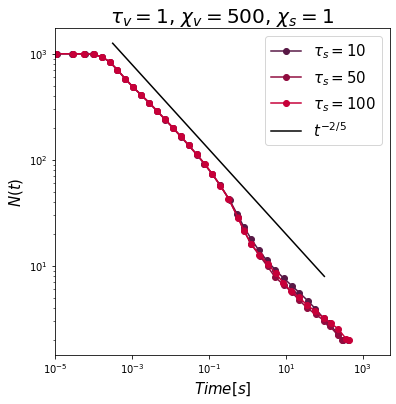

In [5]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')
#for i in range(20) :
#    plt.plot(Nt_taus100[i][:, 0], Nt_taus100[i][:, 1], color='k', alpha=0.2)

c = 0
sim = 0
if sim :
    for taus in Nt_dict.keys() :
        for i in range(20) :
            plt.plot(Nt_dict[taus][i][:, 0], Nt_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
for taus in ['10', '50', '100'] :
#for taus in Nt_dict.keys() :
    plt.plot(res_avg[taus][:, 0], res_avg[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-3.5, 2, 101)
k1, a1 = 50., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1$, $\chi_v=500$, $\chi_s = 1$', fontsize=20)

#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/taus100_taus1.eps', format='eps')

plt.xlim(1e-5, 5e3)

plt.show()




# $\chi_v = 100$, $\chi_s=0.1$

In [6]:
dir_list = ['chiv100_chis0.1_taus0.01', 
            'chiv100_chis0.1_taus1', 
            'chiv100_chis0.1_taus100']

Nt_dict = {}

for dirname in dir_list :
    taus = dirname[len('chiv100_chis0.1_taus'):]
    Nt_dict[taus] = {}
    print('taus : ', taus)
    if taus == '0.1' :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    else :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    

res_avg, res_std = {}, {}
for taus in Nt_dict.keys() :
    res_avg[taus], res_std[taus] = an.batch(data_dict=Nt_dict[taus], wmin=-5, wmax=4, nwindow=50)




taus :  0.01
19  done !

taus :  1
19  done !

taus :  100
19  done !

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !


In [7]:
for dirname in dir_list :
    taus = dirname[len('chiv100_chis0.1_taus'):]

    print('taus : ', taus)
    for i in range(20) :
        np.savetxt(str(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat')), Nt_dict[taus][i][:np.argmin(Nt_dict[taus][i][:, 1])+1])
        print(i, ' done !', end='\r')
    print('\n')
    

taus :  0.01
19  done !

taus :  1
19  done !

taus :  100
19  done !



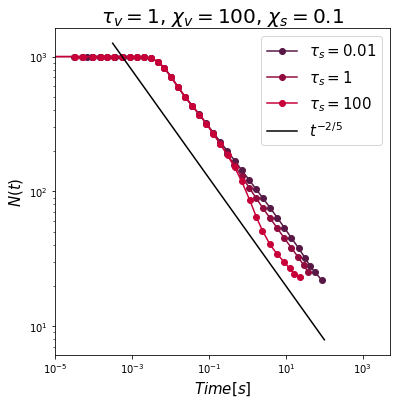

In [8]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')
#for i in range(20) :
#    plt.plot(Nt_taus100[i][:, 0], Nt_taus100[i][:, 1], color='k', alpha=0.2)

c = 0
sim = 0
if sim :
    for taus in Nt_dict.keys() :
        for i in range(20) :
            plt.plot(Nt_dict[taus][i][:, 0], Nt_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
for taus in ['0.01', '1', '100'] :
#for taus in Nt_dict.keys() :
    plt.plot(res_avg[taus][:, 0], res_avg[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-3.5, 2, 101)
k1, a1 = 50., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1$, $\chi_v=100$, $\chi_s = 0.1$', fontsize=20)

#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/taus100_taus1.eps', format='eps')

plt.xlim(1e-5, 5e3)

plt.show()





In [9]:
dir_list = ['chiv100_chis0.01_taus0.01', 
            'chiv100_chis0.01_taus1', 
            'chiv100_chis0.01_taus100']

Nt_dict = {}

for dirname in dir_list :
    taus = dirname[len('chiv100_chis0.01_taus'):]
    Nt_dict[taus] = {}
    print('taus : ', taus)
    if taus == '0.1' :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    else :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    

res_avg, res_std = {}, {}
for taus in Nt_dict.keys() :
    res_avg[taus], res_std[taus] = an.batch(data_dict=Nt_dict[taus], wmin=-5, wmax=4, nwindow=50)





taus :  0.01


OSError: /Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/chiv100_chis0.01_taus0.01/run0000/sim_nlum_bis.dat not found.

# $\chi_v = 50$

In [11]:
dir_list = ['chiv50_chis5_taus1e-2', 
            'chiv50_chis5_taus1e0', 
            'chiv50_chis5_taus1e1',
            'chiv50_chis5_taus1e2']

Nt_dict = {}

for dirname in dir_list :
    taus = dirname[len('chiv50_chis5_taus'):]
    Nt_dict[taus] = {}
    print('taus : ', taus)
    if taus == '0.1' :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    else :
        for i in range(20) :
            Nt_dict[taus][i] = np.loadtxt(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
            print(i, ' done !', end='\r')
        print('\n')
    

res_avg, res_std = {}, {}
for taus in Nt_dict.keys() :
    res_avg[taus], res_std[taus] = an.batch(data_dict=Nt_dict[taus], wmin=-5, wmax=4.5, nwindow=50)



taus :  1e-2
19  done !

taus :  1e0
19  done !

taus :  1e1
19  done !

taus :  1e2
19  done !

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !
End of import !


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


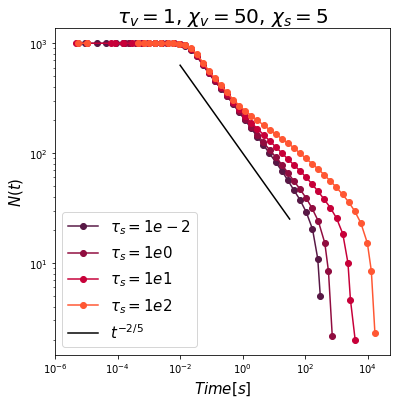

In [13]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')

c = 0
sim = False
if sim :
    for taus in Nt_dict.keys() :
        for i in range(20) :
            plt.plot(Nt_dict[taus][i][:, 0], Nt_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
for taus in ['1e-2', '1e0', '1e1', '1e2'] :
#for taus in Nt_dict.keys() :
    plt.plot(res_avg[taus][:, 0], res_avg[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-2., 1.5, 101)
k1, a1 = 100., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1$, $\chi_v=50$, $\chi_s = 5$', fontsize=20)

plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/chiv50_chis5_trapped.eps', format='eps')

plt.xlim(1e-6, 5e4)

plt.show()



# N(0) = 100

In [14]:
newdir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100'
Nt100_dict = {}

dir_list = ['chiv500_chis1_taus0.01', 
            'chiv500_chis1_taus1', 
            'chiv500_chis1_taus100',
            'chiv500_chis1_taus1000']

for dirname in dir_list :
    taus = dirname[len('chiv500_chis1_taus'):]
    Nt100_dict[taus] = {}
    print('taus : ', taus)
    for i in range(20) :
        Nt100_dict[taus][i] = np.loadtxt(os.path.join(newdir, dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
        print(i, ' done !', end='\r')
    print('\n')
    
    

res_avg100, res_std100 = {}, {}
for taus in Nt100_dict.keys() :
    res_avg100[taus], res_std100[taus] = an.batch(data_dict=Nt100_dict[taus], wmin=-5, wmax=3, nwindow=40)


    

taus :  0.01
19  done !

taus :  1
19  done !

taus :  100
19  done !

taus :  1000
19  done !

End of import !
End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !


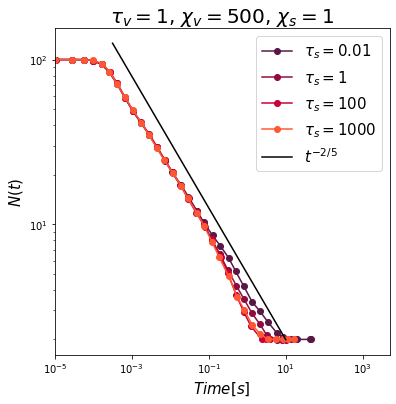

In [15]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')
#for i in range(20) :
#    plt.plot(Nt_taus100[i][:, 0], Nt_taus100[i][:, 1], color='k', alpha=0.2)

c = 0
sim = False
if sim :
    for taus in Nt100_dict.keys() :
        for i in range(20) :
            plt.plot(Nt100_dict[taus][i][:, 0], Nt100_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
#for taus in ['0.01', '1', '100'] :
for taus in Nt100_dict.keys() :
    plt.plot(res_avg100[taus][:, 0], res_avg100[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-3.5, 1, 101)
k1, a1 = 5., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
plt.title(r'$\tau_v=1$, $\chi_v=500$, $\chi_s = 1$', fontsize=20)

#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/taus100_taus1.eps', format='eps')

plt.xlim(1e-5, 5e3)

plt.show()




In [16]:
newdir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N100'
Nt100_dict = {}

dir_list = ['chiv50_chis1_taus0.01', 
            'chiv50_chis1_taus1', 
            'chiv50_chis1_taus100']

for dirname in dir_list :
    taus = dirname[len('chiv50_chis1_taus'):]
    Nt100_dict[taus] = {}
    print('taus : ', taus)
    for i in range(20) :
        Nt100_dict[taus][i] = np.loadtxt(os.path.join(newdir, dirname, 'run'+str(i).zfill(4), 'sim_nlum.dat'))
        print(i, ' done !', end='\r')
    print('\n')
    
    

res_avg100, res_std100 = {}, {}
for taus in Nt100_dict.keys() :
    res_avg100[taus], res_std100[taus] = an.batch(data_dict=Nt100_dict[taus], wmin=-5, wmax=4, nwindow=40)


    

taus :  0.01
19  done !

taus :  1
19  done !

taus :  100
19  done !

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !
End of import !


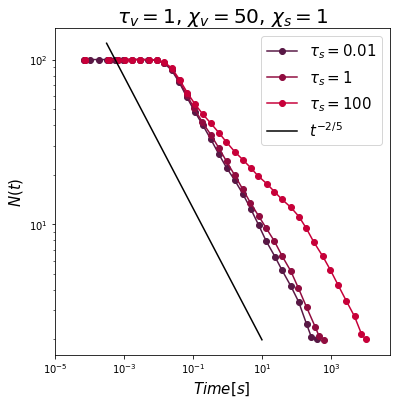

In [17]:
plt.figure(figsize = (6, 6))

plt.xscale('log')
plt.yscale('log')
#for i in range(20) :
#    plt.plot(Nt_taus100[i][:, 0], Nt_taus100[i][:, 1], color='k', alpha=0.2)

c = 0
sim = False
if sim :
    for taus in Nt100_dict.keys() :
        for i in range(20) :
            plt.plot(Nt100_dict[taus][i][:, 0], Nt100_dict[taus][i][:, 1], color=clist[c], alpha=0.2)
        c += 1

c = 0
#for taus in ['0.01', '1', '100'] :
for taus in Nt100_dict.keys() :
    plt.plot(res_avg100[taus][:, 0], res_avg100[taus][:, 1], marker='o', color=clist[c], label = r'$\tau_s = '+taus+'$')
    c += 1



t1 = np.logspace(-3.5, 1, 101)
k1, a1 = 5., -2/5.
plt.plot(t1, k1*t1**a1, label=r'$t^{-2/5}$', color='k')

t2 = np.logspace(0, 3, 101)
k2, a2 = 10, -2/5.
#plt.plot(t2, k2*t2**a2, label=r'$t^{-2/5}$', color='k', linestyle='--')

plt.xlabel(r'$Time [s]$', fontsize=15)
plt.ylabel(r'$N(t)$', fontsize=15)

plt.legend(fontsize=15)
#plt.title(r'$\tau_v=1$, $\chi_v=500$, $\chi_s = 1$', fontsize=20)
plt.title(r'$\tau_v=1$, $\chi_v=50$, $\chi_s = 1$', fontsize=20)

#plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/taus100_taus1.eps', format='eps')

plt.xlim(1e-5, 5e4)

plt.show()





# Cleaning

In [5]:
for dirname in dir_list :
    taus = dirname[len('chiv50_chis1_taus'):]

    print('taus : ', taus)
    for i in range(20) :
        np.savetxt(str(os.path.join(main_dir, dirname, 'run'+str(i).zfill(4), 'sim_nlum_bis.dat')), Nt_dict[taus][i][:np.argmin(Nt_dict[taus][i][:, 1])+1])
        print(i, ' done !', end='\r')
    print('\n')
    

taus :  0.01
19  done !

taus :  1
19  done !

taus :  10
19  done !

taus :  100
19  done !

